In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_pickle('churn_final.pickle')

In [48]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [49]:
df.head()

,taxi_id_,w_,v_total_tips_count_1,v_mean_tips_count_1,v_total_tips_count_2,v_mean_tips_count_2,v_total_tips_count_3,v_mean_tips_count_3,v_total_tips_count_4,v_mean_tips_count_4,...,v_mean_trip_total_sum_4,v_pct_cc_1,v_pct_cc_2,v_pct_cc_3,v_pct_cc_4,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4,y
0,96.0,4,161,161.0,289.0,144.5,442.0,147.333333,596.0,149.00,...,1867.2225,0.648891,0.638204,0.620989,0.599740,7.0,7.0,7.0,7.0,0
1,96.0,5,158,158.0,319.0,159.5,447.0,149.000000,600.0,150.00,...,1841.1525,0.544212,0.601349,0.607457,0.602491,7.0,7.0,7.0,7.0,0
2,96.0,6,176,176.0,334.0,167.0,495.0,165.000000,623.0,155.75,...,1892.5800,0.548710,0.546674,0.582686,0.590803,7.0,7.0,7.0,7.0,0
3,96.0,7,151,151.0,327.0,163.5,485.0,161.666667,646.0,161.50,...,1986.9775,0.563436,0.555615,0.552136,0.578097,7.0,7.0,7.0,7.0,0
4,96.0,8,163,163.0,314.0,157.0,490.0,163.333333,648.0,162.00,...,1982.9625,0.591537,0.578262,0.567962,0.562649,7.0,7.0,7.0,7.0,0


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
var = [v for v in df.columns if v[:2]=='v_']

In [52]:
X = df[var].copy()

In [53]:
sc = StandardScaler()

In [54]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
Xs = pd.DataFrame(sc.transform(X),columns=var)

In [56]:
pca = PCA(n_components=3)

In [57]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca.explained_variance_

array([30.75372815,  6.2243995 ,  4.93666199])

In [59]:
pca.explained_variance_ratio_.cumsum()

array([0.64048803, 0.77011958, 0.87293225])

In [60]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2','p3'])

In [61]:
Xp.corr()

,p1,p2,p3
p1,1.000000e+00,1.017688e-14,-9.605631e-16
p2,1.017688e-14,1.000000e+00,-7.870920e-16
p3,-9.605631e-16,-7.870920e-16,1.000000e+00


In [62]:
Xp['y'] = df['y']

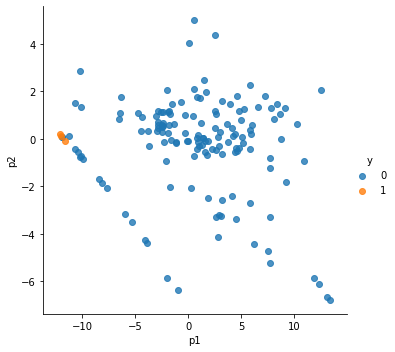

In [63]:
sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',hue='y',fit_reg=False)

In [64]:
from sklearn.manifold import MDS

In [65]:
mds = MDS(n_components=2,n_jobs=-1)

In [66]:
Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])

In [67]:
Xm.shape

(2985, 2)

In [68]:
Xm['y'] = df['y']

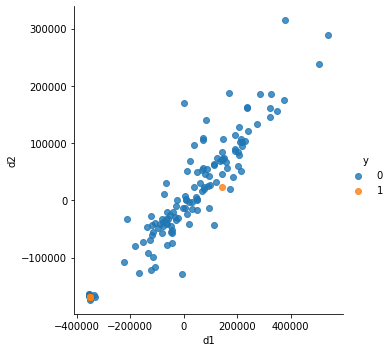

In [69]:
sns.lmplot(data=Xm.sample(frac=0.05),x='d1',y='d2',hue='y',fit_reg=False)

In [70]:
Xm.corr()

,d1,d2,y
d1,1.000000,0.948810,-0.231194
d2,0.948810,1.000000,-0.223594
y,-0.231194,-0.223594,1.000000


In [71]:
from sklearn.manifold import TSNE

In [72]:
tsne = TSNE(n_components=2,n_jobs=-1)

In [73]:
Xt = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2'])

In [74]:
Xt['y'] = df['y']

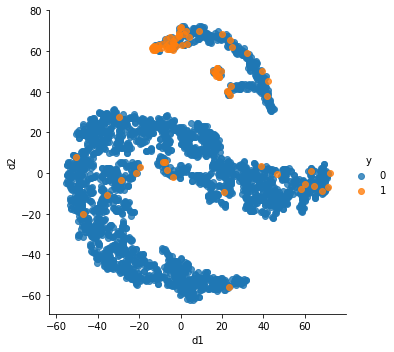

In [75]:
sns.lmplot(data=Xt,x='d1',y='d2',hue='y',fit_reg=False)

In [76]:
Xt.corr()

,d1,d2,y
d1,1.000000,0.143777,0.032362
d2,0.143777,1.000000,0.230672
y,0.032362,0.230672,1.000000


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [78]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(Xp[['p1','p2','p3']],Xp[['y']],train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.9212764072811019
0.8955944189602447
0.9684059358544759
0.9720982142857143


/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(Xm[['d1','d2']],Xp[['y']],train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.8558604439039221
0.8591511936339522
0.5514600287218765
0.5535714285714286


/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(Xt[['d1','d2']],Xt[['y']],train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

KeyError: "None of [Index(['y'], dtype='object')] are in the [columns]"